## Load in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import geopandas as gpd 
import math
import seaborn as sns

path = '../data/cleaned_data/'
fname = 'listings_complex.csv'

data = pd.read_csv(open(path+ fname))

## Cleaning Price Outliers

Upper Whisker of All Data: 279.0
Lower Whisker of All Data: 0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x16d2c31f0>,
 'caps': [<matplotlib.lines.Line2D at 0x16d2c3790>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d2c2f20>],
 'medians': [<matplotlib.lines.Line2D at 0x16d2c3d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d308040>],
 'means': []}

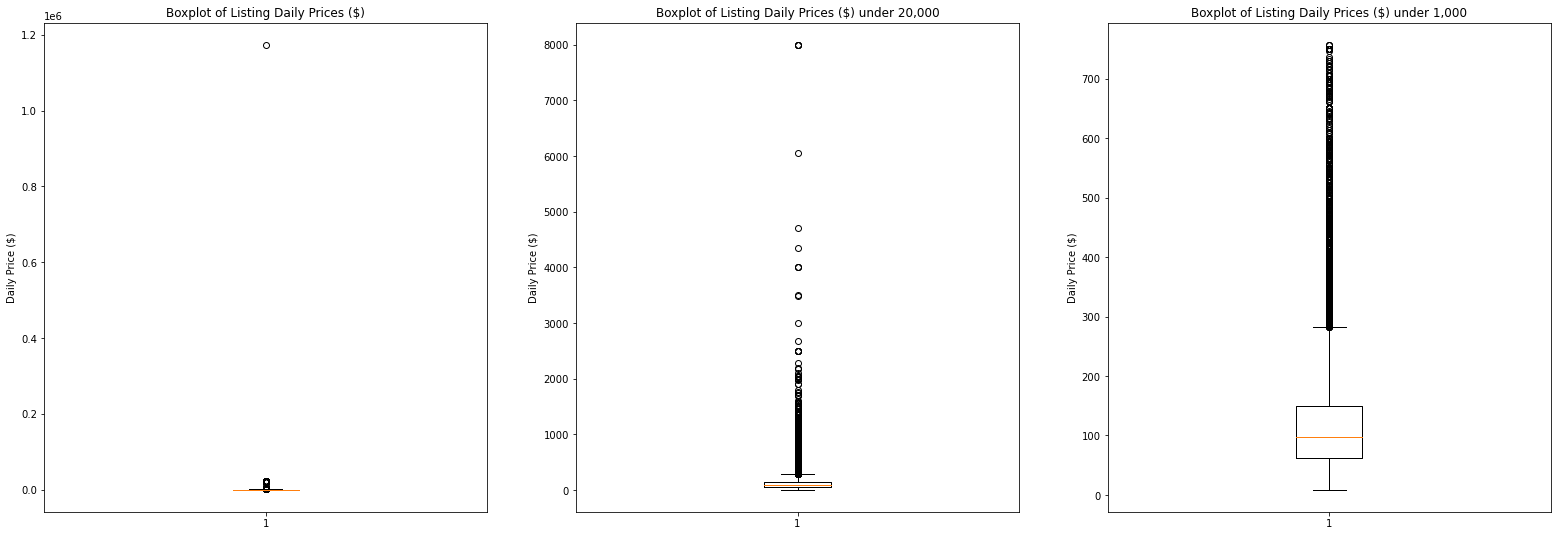

In [2]:
fig, ax = plt.subplots(1,3, figsize=(27, 9))
ax[0].set_title('Boxplot of Listing Daily Prices ($)')
ax[0].set_ylabel('Daily Price ($)')
ax[0].boxplot(data['price'])
median = data['price'].quantile(.5)
upper_quartile = data['price'].quantile(.75)
lower_quartile = data['price'].quantile(.25)
iqr = upper_quartile - lower_quartile
print(f'Upper Whisker of All Data: {data[data["price"]<=upper_quartile+1.5*iqr]["price"].max()}')
print(f'Lower Whisker of All Data: {data[data["price"]>=lower_quartile-1.5*iqr]["price"].min()}')

manual_inspection_outlier_bound = (0,20000)
ax[1].set_title('Boxplot of Listing Daily Prices ($) under 20,000')
ax[1].set_ylabel('Daily Price ($)')
outlier_upper = min(data['price'].mean()+ 3*data['price'].std(),manual_inspection_outlier_bound[1])
outlier_under = max(data['price'].mean()- 3*data['price'].std(),manual_inspection_outlier_bound[0])
data = data[(data['price']<outlier_upper) & (data['price']>outlier_under)]
ax[1].boxplot(data['price'])

dense_data_bound = (0,1000)
ax[2].set_title('Boxplot of Listing Daily Prices ($) under 1,000')
ax[2].set_ylabel('Daily Price ($)')
outlier_upper = min(data['price'].mean()+ 3*data['price'].std(),dense_data_bound[1])
outlier_under = max(data['price'].mean()- 3*data['price'].std(),dense_data_bound[0])
data = data[(data['price']<outlier_upper) & (data['price']>outlier_under)]
ax[2].boxplot(data['price'])

## Checking Validity of Data

Text(0.5, 1.0, 'Distribution of Dates Listings Were Scraped')

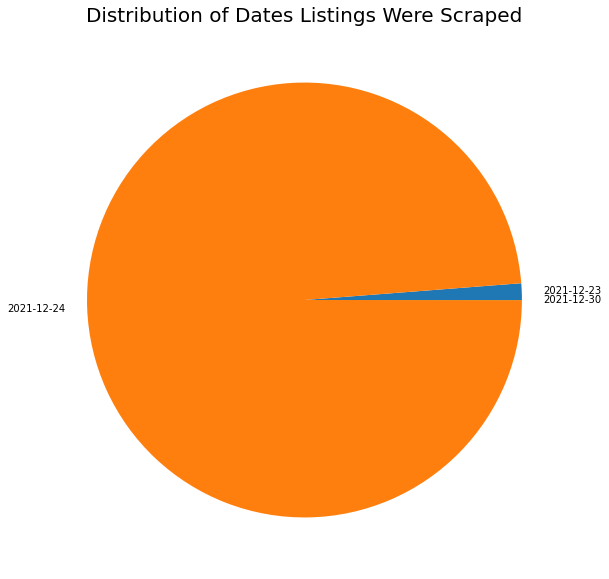

In [3]:
pie_data = data.groupby('last_scraped').size().reset_index(name='counts')
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.pie(pie_data['counts'],labels=pie_data['last_scraped'])
plt.title('Distribution of Dates Listings Were Scraped',fontsize=20)

## Heatmap of Locations of Properties

Text(840.6863284281887, 0.5, 'Latitude')

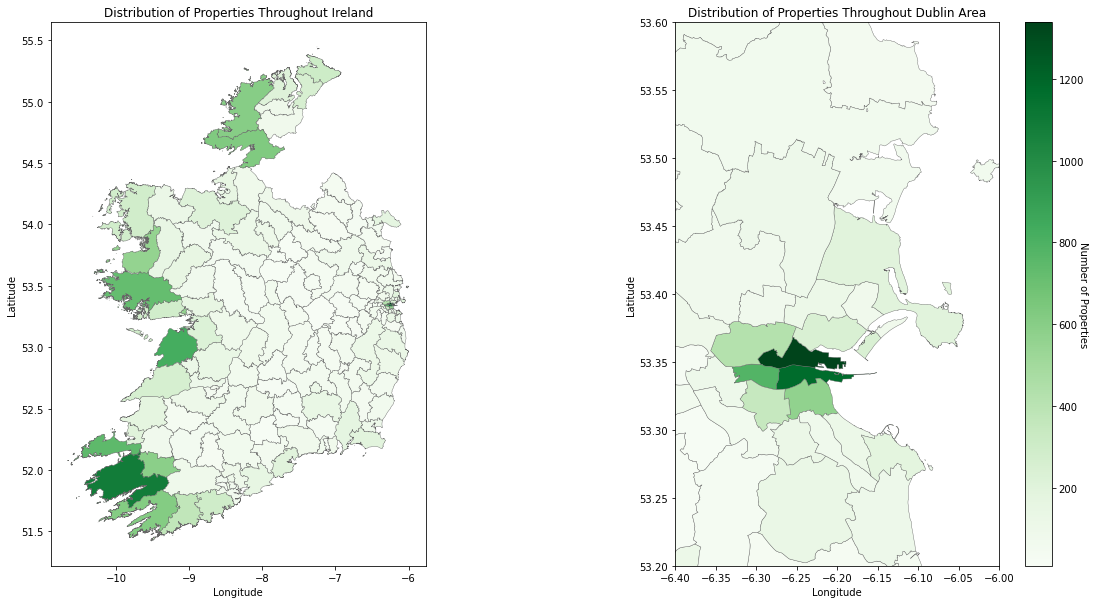

In [4]:
fname = 'neighbourhoods.geojson'

## Integrate Data ##
Ireland_map = gpd.read_file(path+fname)
property_count = data.groupby('region_name').size().reset_index(name='counts')
map_and_stats = Ireland_map.merge(property_count, left_on="neighbourhood",right_on="region_name")

## Plot Data ##
fig, ax = plt.subplots(1,2, figsize=(20, 10))
plt.xlim([-6.4,-6])
plt.ylim([53.2,53.6])
map_and_stats.plot(column="counts", cmap="Greens", linewidth=0.4, ax=ax[0], edgecolor=".4")
ax[0].set_title('Distribution of Properties Throughout Ireland')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

map_and_stats.plot(column="counts", cmap="Greens", linewidth=0.4, ax=ax[1], edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=property_count['counts'].min(), vmax=property_count['counts'].max()))
bar_info._A = []
cbar = fig.colorbar(bar_info)
cbar.set_label('Number of Properties', rotation=270)
ax[1].set_title('Distribution of Properties Throughout Dublin Area')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

## Scatterplot of Bathrooms vs. Daily Price

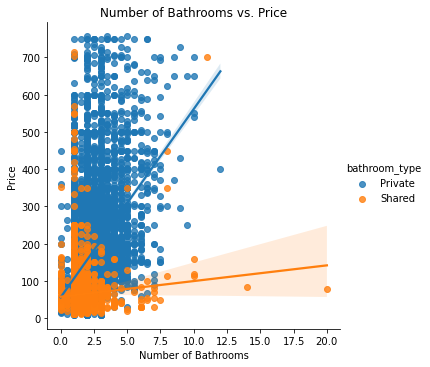

In [5]:
p = sns.lmplot(x='bathrooms_text', y='price', data=data, hue='bathroom_type', fit_reg=True)
p.set( xlabel = "Number of Bathrooms", ylabel = "Price", title = 'Number of Bathrooms vs. Price')

## Map of Average Price Latitude/Longitude Plotting Properties

Text(840.6863284281887, 0.5, 'Latitude')

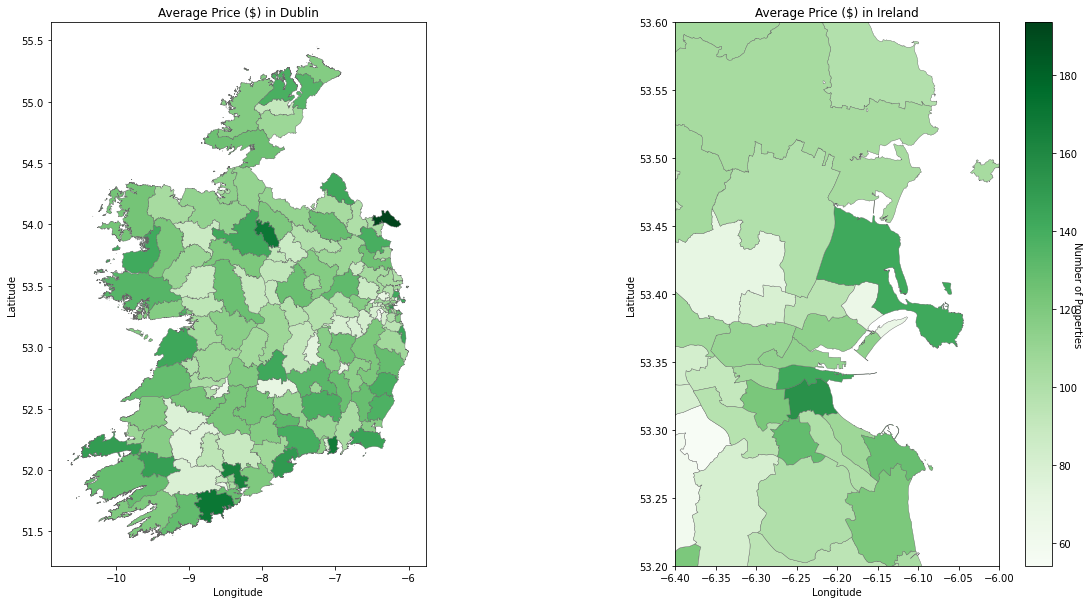

In [6]:
fname = 'neighbourhoods.geojson'

## Integrate Data ##
Ireland_map = gpd.read_file(path+fname)
avg_price = data.groupby('region_name').mean()
map_and_stats = Ireland_map.merge(avg_price, left_on="neighbourhood",right_on="region_name")

## Plot Data ##
fig, ax = plt.subplots(1,2, figsize=(20, 10))
plt.xlim([-6.4,-6])
plt.ylim([53.2,53.6])
map_and_stats.plot(column="price", cmap="Greens", linewidth=0.4, ax=ax[0], edgecolor=".4")
ax[0].set_title('Average Price ($) in Dublin')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

map_and_stats.plot(column="price", cmap="Greens", linewidth=0.4, ax=ax[1], edgecolor=".4")
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=avg_price['price'].min(), vmax=avg_price['price'].max()))
bar_info._A = []
cbar = fig.colorbar(bar_info)
cbar.set_label('Number of Properties', rotation=270)
ax[1].set_title('Average Price ($) in Ireland')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

## Comparative Boxplots of Price Distribution of Different Room Types

Text(0, 0.5, 'Price ($)')

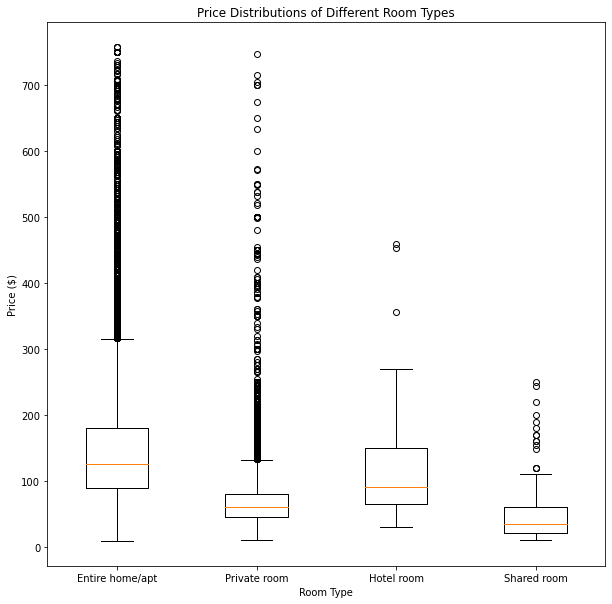

In [7]:
boxplot_data = []
for room_type in data['room_type'].unique():
    boxplot_data.append(data[data['room_type']==room_type]['price'])
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.boxplot(boxplot_data)
indeces = [1,2,3,4]
plt.xticks(indeces, data['room_type'].unique())
plt.title('Price Distributions of Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')

## Covariances of Numeric Data

Index(['price', 'accommodates', 'bedrooms', 'beds', 'bathrooms_text',
       'calculated_host_listings_count_entire_homes', 'availability_30',
       'availability_60'],
      dtype='object')


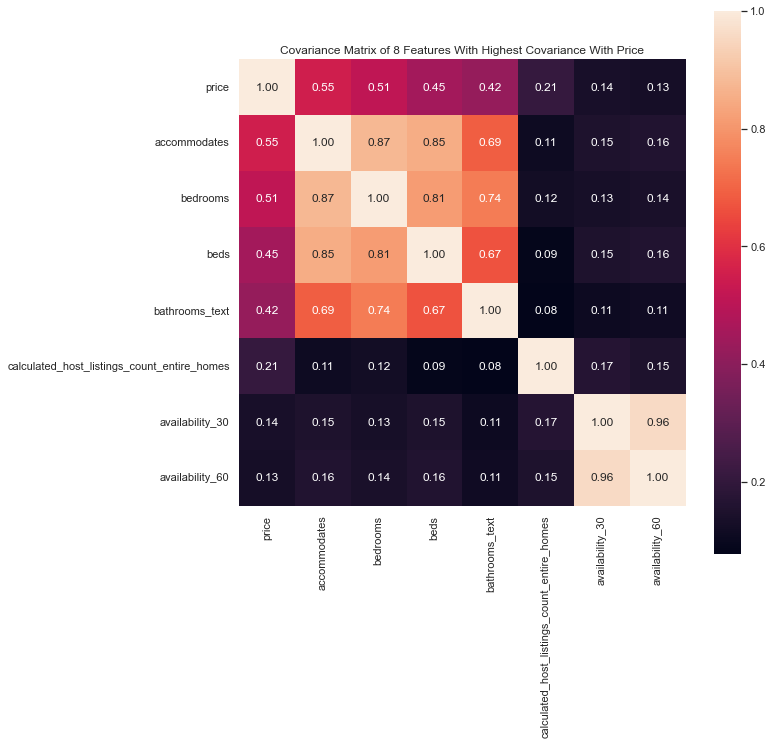

In [8]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(8, 'price').index
print(columns)
correlation_map = data[columns].corr(method='pearson')
sns.set(font_scale=1.0)
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.title('Covariance Matrix of 8 Features With Highest Covariance With Price')


heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()